In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import data

In [ ]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


1. Data Understanding

In [ ]:
laptops_df["Manufacturer"] = laptops_df["Manufacturer"].astype('category').cat.codes


In [ ]:
print("Data Shape : ", df.shape)

Data Shape :  (200, 6)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.Drug.value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [ ]:
df.Sex.value_counts()

,count
Sex,
M,104
F,96


<Axes: xlabel='Age', ylabel='Count'>

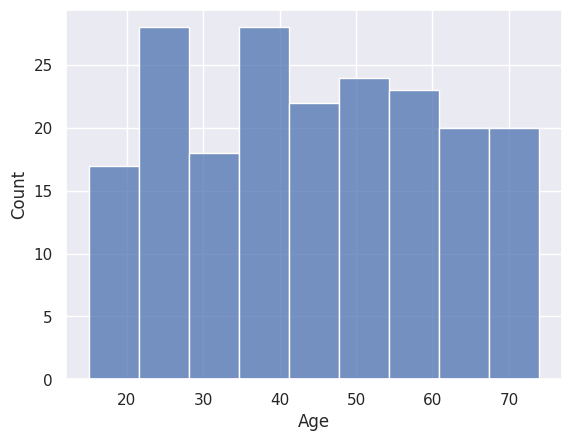

In [ ]:
sns.histplot(data=df, x='Age')


2. Cleaning Data

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
df.duplicated().sum()

0

3. EDA

<ipython-input-66-2e1f7338110e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Drug', palette='flare')


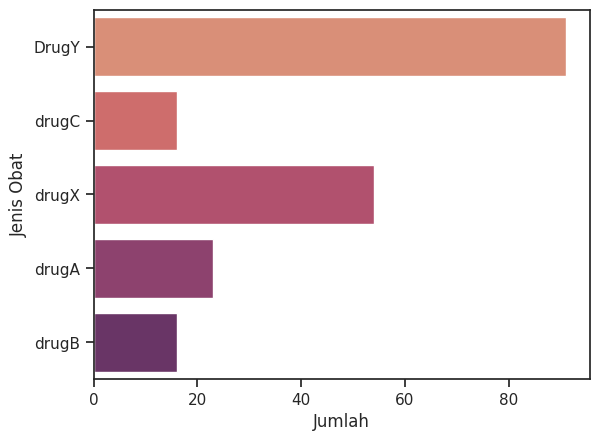

In [ ]:
sns.set_theme(style='ticks')
sns.countplot(data=df, y='Drug', palette='flare')
plt.ylabel('Jenis Obat')
plt.xlabel('Jumlah')
plt.show()

<ipython-input-67-e5bd55f15478>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='rocket')


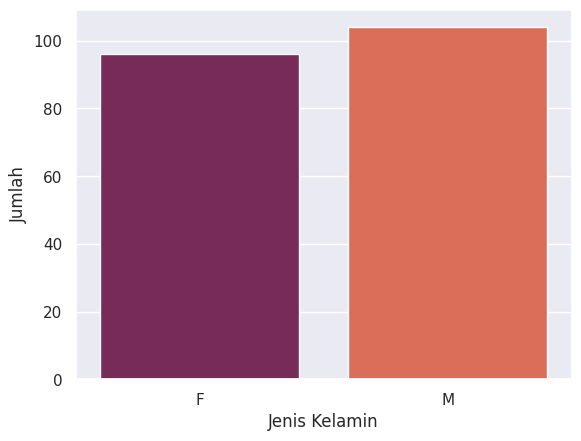

In [ ]:
sns.set_theme(style='darkgrid')
sns.countplot(data=df, x='Sex', palette='rocket')
plt.ylabel('Jumlah')
plt.xlabel('Jenis Kelamin')
plt.show()

4. Data Preparation

In [ ]:
df.head() # Menampilkan 5 data pertama

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [ ]:
x = df.drop(columns=['Drug'])
y = df['Drug']

print('x : ', x.shape)
print('y : ', y.shape)

x :  (200, 5)
y :  (200,)


In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

5. Modelling % Evaluation

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('KNN Accuracy : {:.2f}%' .format(knn_acc*100))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      0.91      0.95        11

    accuracy                           0.95        40
   macro avg       0.98      0.95      0.96        40
weighted avg       0.96      0.95      0.95        40

KNN Accuracy : 95.00%


6. Testing

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [ ]:
new_data = {'Age' : [27],
        'Sex' : [0],
        'BP' : [2],
        'Cholesterol' : [1],
        'Na_to_K' : [28]}

new_data = pd.DataFrame(new_data)
new_data

,Age,Sex,BP,Cholesterol,Na_to_K
0,27,0,2,1,28


In [ ]:
scaled_data_baru = scaler.transform(new_data)
scaled_data_baru


array([[-1.0492094 , -1.040833  ,  1.32976279,  1.03046381,  1.65358382]])

In [ ]:
y_pred_baru = knn.predict(scaled_data_baru)
y_pred_baru

print("Hasil Prediksi Dari Data Baru : ", y_pred_baru)

Hasil Prediksi Dari Data Baru :  [0]
